<a href="https://colab.research.google.com/github/MonoaraAkter/ML-Lab/blob/main/Automobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set(style="whitegrid")

In [ ]:
sns.set(style="whitegrid")

In [ ]:
file_path = 'Automobile.csv'  # Default path in Colab after upload
df = pd.read_csv(file_path)

In [ ]:
print("Dataset Info:")
df.info()
print("\nFirst 5 rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB

First 5 rows:
                        name   mpg  cylinders  displacement  horsepower  \
0  chevrolet chevelle malibu  18.0          8         307.0       130.0   
1          buick skylark 320  15.0          8         350.0       165.0   
2         plymouth satellite  18.0          8         318.0       150.0   
3              amc rebel sst  1

In [ ]:
df = df.dropna(subset=['mpg', 'horsepower'])

In [ ]:
# Convert types if needed (horsepower might have '?' in full dataset; replace and convert to numeric)
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df = df.dropna(subset=['horsepower'])  # Drop any rows with invalid horsepower

In [ ]:
# Calculate average MPG by origin
avg_mpg_by_origin = df.groupby('origin')['mpg'].mean().reset_index().sort_values('mpg', ascending=False)

In [ ]:
# Calculate average horsepower by cylinders
avg_hp_by_cylinders = df.groupby('cylinders')['horsepower'].mean().reset_index().sort_values('horsepower', ascending=False)

In [ ]:
# Average weight by model year
avg_weight_by_year = df.groupby('model_year')['weight'].mean().reset_index()

In [ ]:
# Top 10 cars by MPG
top_mpg_cars = df.sort_values('mpg', ascending=False).head(10)[['name', 'mpg', 'origin']]

In [ ]:
# Print summaries
print("\nAverage MPG by Origin:")
print(avg_mpg_by_origin)
print("\nAverage Horsepower by Cylinders:")
print(avg_hp_by_cylinders)
print("\nAverage Weight by Model Year:")
print(avg_weight_by_year)
print("\nTop 10 Cars by MPG:")
print(top_mpg_cars)


Average MPG by Origin:
   origin        mpg
1   japan  30.450633
0  europe  27.602941
2     usa  20.033469

Average Horsepower by Cylinders:
   cylinders  horsepower
4          8  158.300971
3          6  101.506024
0          3   99.250000
2          5   82.333333
1          4   78.281407

Average Weight by Model Year:
    model_year       weight
0           70  3372.793103
1           71  3030.592593
2           72  3237.714286
3           73  3419.025000
4           74  2878.038462
5           75  3176.800000
6           76  3078.735294
7           77  2997.357143
8           78  2861.805556
9           79  3055.344828
10          80  2441.592593
11          81  2530.178571
12          82  2434.166667

Top 10 Cars by MPG:
                                name   mpg  origin
322                        mazda glc  46.6   japan
329              honda civic 1500 gl  44.6   japan
325             vw rabbit c (diesel)  44.3  europe
394                        vw pickup  44.0  europe
326      

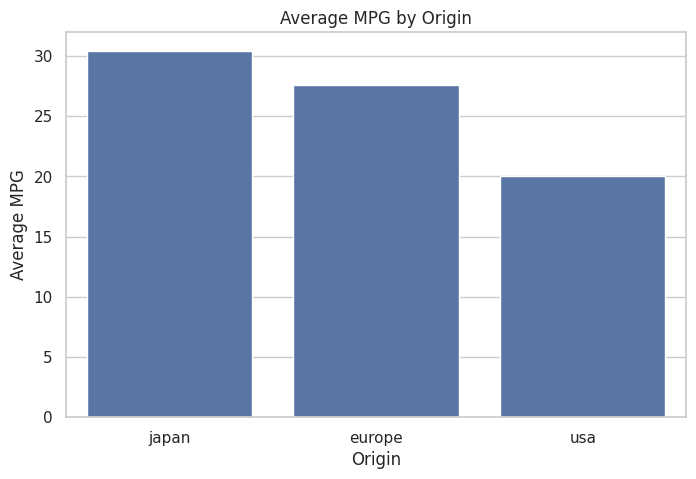

In [ ]:
# Plot 1: Bar plot of Average MPG by Origin
plt.figure(figsize=(8, 5))
sns.barplot(x='origin', y='mpg', data=avg_mpg_by_origin)
plt.title('Average MPG by Origin')
plt.xlabel('Origin')
plt.ylabel('Average MPG')
plt.show()

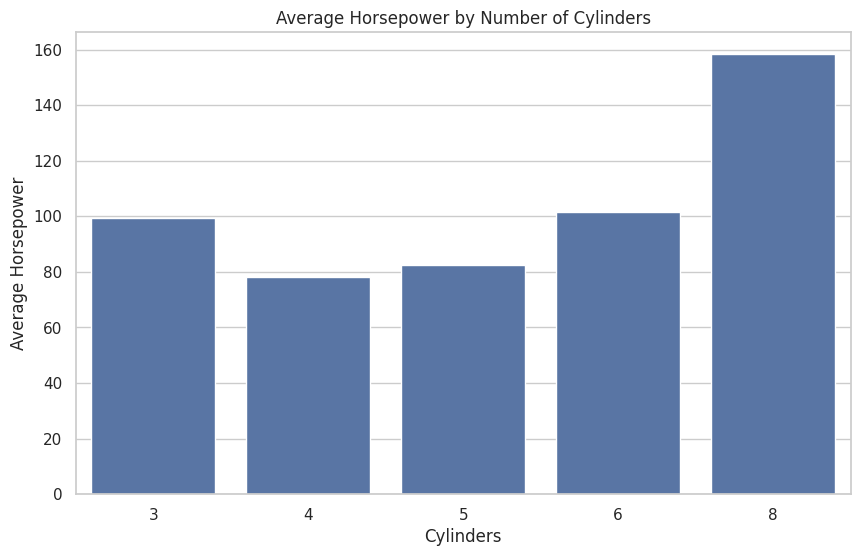

In [ ]:
# Plot 2: Bar plot of Average Horsepower by Cylinders
plt.figure(figsize=(10, 6))
sns.barplot(x='cylinders', y='horsepower', data=avg_hp_by_cylinders)
plt.title('Average Horsepower by Number of Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('Average Horsepower')
plt.show()

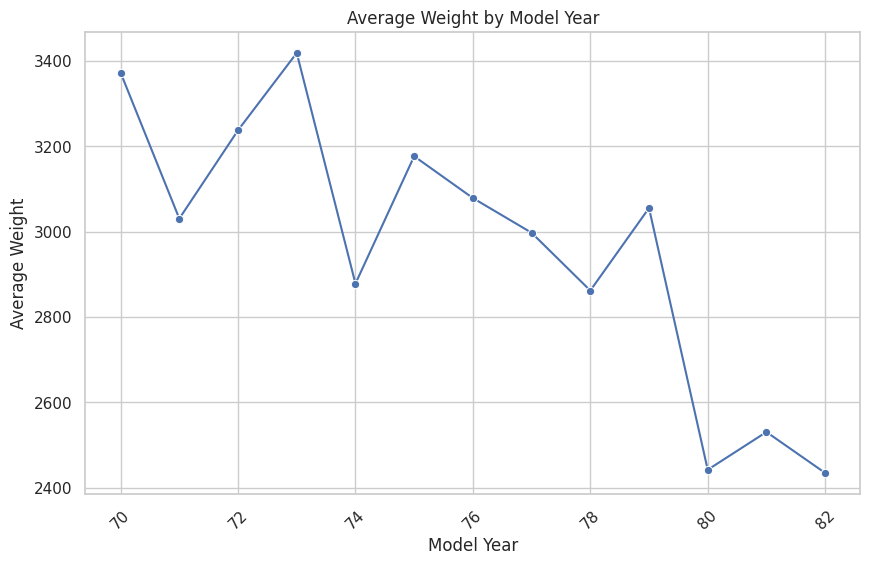

In [ ]:
# Plot 3: Line plot of Average Weight by Model Year
plt.figure(figsize=(10, 6))
sns.lineplot(x='model_year', y='weight', data=avg_weight_by_year, marker='o')
plt.title('Average Weight by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Weight')
plt.xticks(rotation=45)
plt.show()

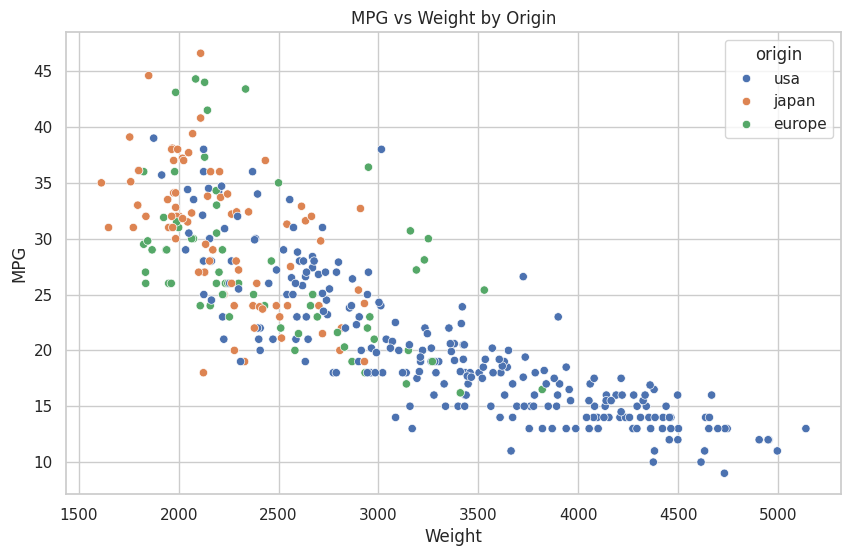

In [ ]:
#Plot 4: Scatter plot of MPG vs Weight, colored by Origin
plt.figure(figsize=(10, 6))
sns.scatterplot(x='weight', y='mpg', hue='origin', data=df)
plt.title('MPG vs Weight by Origin')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.show()

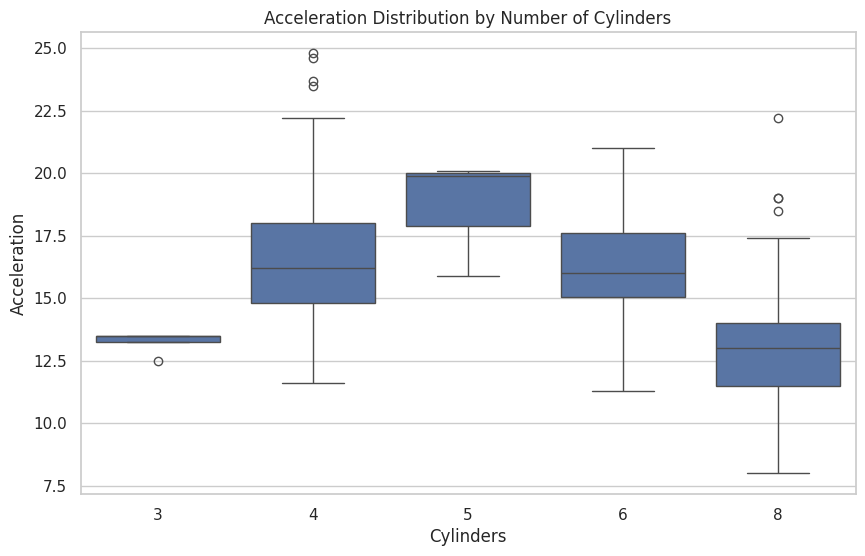

In [ ]:
# Plot 5: Box plot of Acceleration by Cylinders
plt.figure(figsize=(10, 6))
sns.boxplot(x='cylinders', y='acceleration', data=df)
plt.title('Acceleration Distribution by Number of Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('Acceleration')
plt.show()

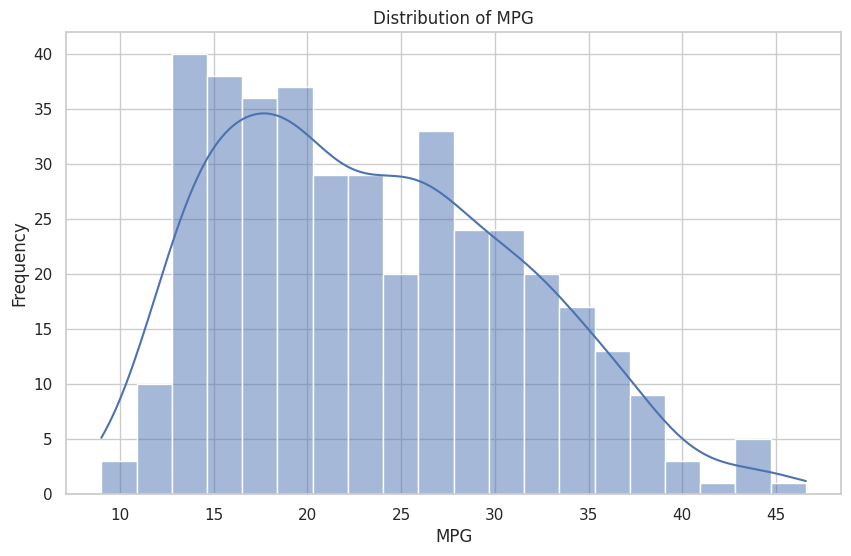

In [ ]:
# Plot 6: Histogram of MPG Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['mpg'], bins=20, kde=True)
plt.title('Distribution of MPG')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.show()

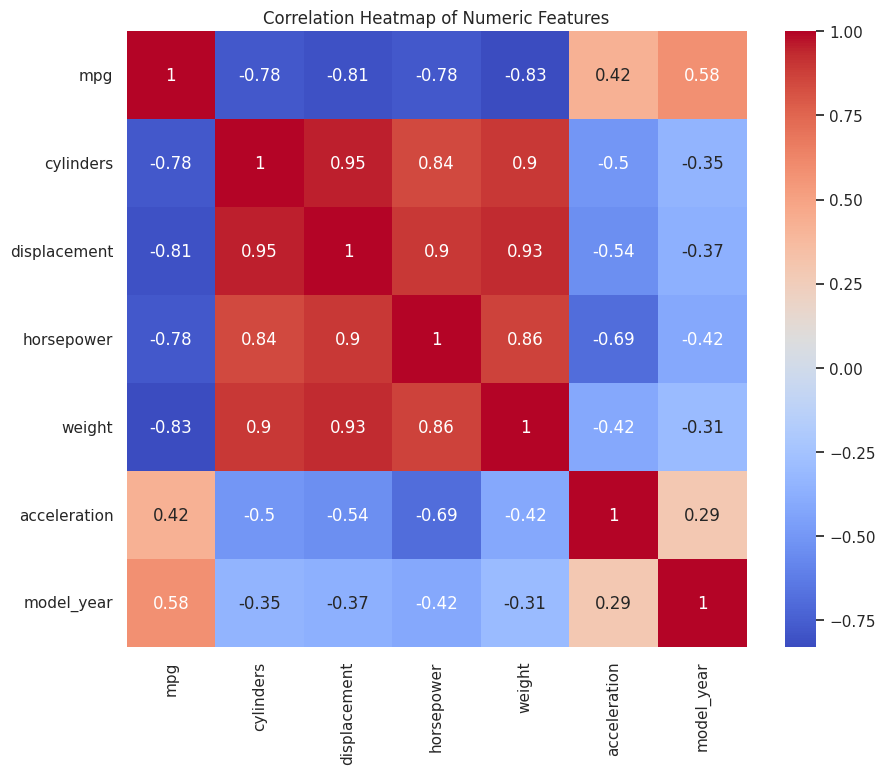

In [ ]:
#Additional: Correlation heatmap of numeric features
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()